<Axes: title={'center': 'Field 2D structured: (2, 100, 100)'}, xlabel='X', ylabel='Y'>

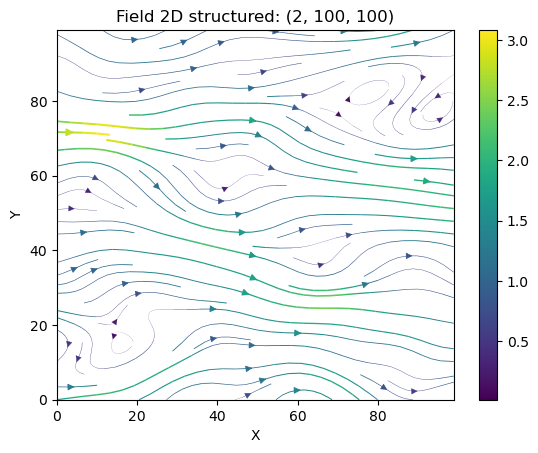

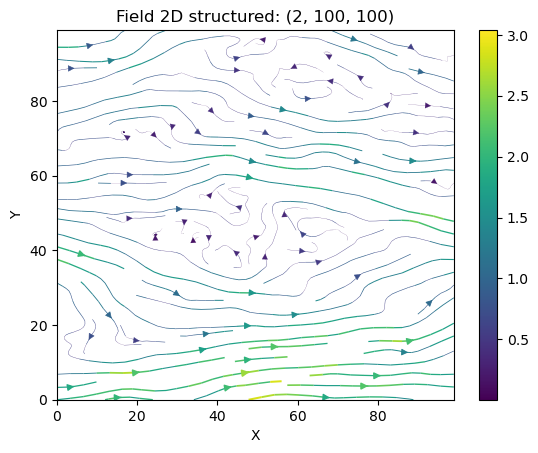

In [3]:
"""
Generating a Random 2D Vector Field
-----------------------------------

As a first example we are going to generate a 2d vector field with a Gaussian
covariance model on a structured grid:
"""
import numpy as np

import gstools as gs

# the grid
x = np.arange(100)
y = np.arange(100)

# a smooth Gaussian covariance model
model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, generator="VectorField", seed=19841203)
srf((x, y), mesh_type="structured")
srf.plot()

###############################################################################
# Let us have a look at the influence of the covariance model. Choosing the
# exponential model and keeping all other parameters the same

# a rougher exponential covariance model
model2 = gs.Exponential(dim=2, var=1, len_scale=10)
srf.model = model2
srf((x, y), mesh_type="structured", seed=19841203)
srf.plot()

###############################################################################
# and we see, that the wiggles are much "rougher" than the smooth Gaussian ones.


###############################################################################
# Applications
# ~~~~~~~~~~~~
#
# One great advantage of the Kraichnan method is, that after some initializations,
# one can compute the velocity field at arbitrary points, online, with hardly any
# overhead.
# This means, that for a Lagrangian transport simulation for example, the velocity
# can be evaluated at each particle position very efficiently and without any
# interpolation. These field interpolations are a common problem for Lagrangian
# methods.


In [7]:
"""
Generating a Random 3D Vector Field
-----------------------------------

In this example we are going to generate a random 3D vector field with a
Gaussian covariance model. The mesh on which we generate the field will be
externally defined and it will be generated by PyVista.
"""
# sphinx_gallery_thumbnail_path = 'pics/GS_3d_vector_field.png'
import pyvista as pv

import gstools as gs

# mainly for setting a white background
pv.set_plot_theme("document")

###############################################################################
# create a uniform grid with PyVista
dimensions, spacing, origin = (40, 30, 10), (1, 1, 1), (-10, 0, 0)
mesh = pv.ImageData(dimensions=dimensions, spacing=spacing, origin=origin)

###############################################################################
# create an incompressible random 3d velocity field on the given mesh
# with added mean velocity in x-direction
model = gs.Gaussian(dim=3, var=3, len_scale=1.5)
srf = gs.SRF(model, mean=(0.5, 0, 0), generator="VectorField", seed=198412031)
srf.mesh(mesh, points="points", name="Velocity")

###############################################################################
# Now, we can do the plotting
streamlines = mesh.streamlines(
    "Velocity",
    terminal_speed=0.0,
    n_points=800,
    source_radius=2.5,
)

# set a fancy camera position
cpos = [(25, 23, 17), (0, 10, 0), (0, 0, 1)]

p = pv.Plotter()
# adding an outline might help navigating in 3D space
# p.add_mesh(mesh.outline(), color="k")
p.add_mesh(
    streamlines.tube(radius=0.005),
    show_scalar_bar=False,
    diffuse=0.5,
    ambient=0.5,
)

###############################################################################
# .. note::
#    PyVista is not working on readthedocs, but you can try it out yourself by
#    uncommenting the following line of code.

# p.show(cpos=cpos)

###############################################################################
# The result should look like this:
#
# .. image:: https://github.com/GeoStat-Framework/GeoStat-Framework.github.io/raw/master/img/GS_3d_vector_field.png
#    :width: 400px
#    :align: center


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations